Importación de librerías

In [2]:
#Machine Learning y ETL
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from itertools import product
from datetime import datetime

#requeridos para traer datos de la PI WEB API
from pandas import json_normalize
from urllib.parse import urlparse
from requests.auth import HTTPBasicAuth
from requests_kerberos import HTTPKerberosAuth

Ingrese el path de su csv

In [5]:
df = pd.read_csv("MC-WTG13.csv", header=0, index_col=0)

In [14]:
df.isnull().sum()/df.shape[0]*100

Ambient.WindDir        0.000000
Ambient.WindSpeed      0.000000
Grid.Power             0.000000
Ambient.Temperature    0.044509
dtype: float64

<Axes: ylabel='Timestamp'>

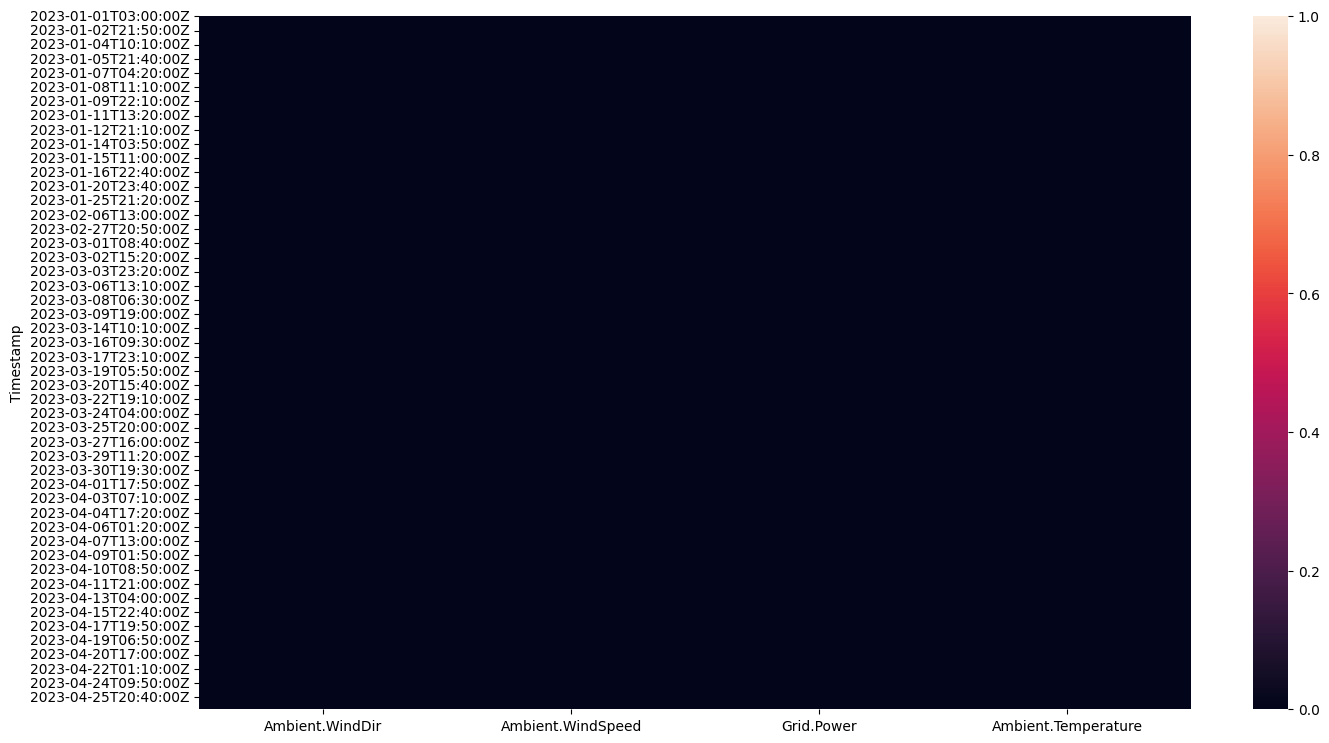

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [16]:
df.fillna(method='ffill', inplace=True)

C:\Users\jadurian\AppData\Local\Temp\ipykernel_13064\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [17]:
print(df.isnull().sum())

Ambient.WindDir        0
Ambient.WindSpeed      0
Grid.Power             0
Ambient.Temperature    0
dtype: int64


In [18]:
df = df[["Grid.Power", #reordenamiento de columnas
             "Ambient.WindSpeed",
             "Ambient.WindDir", 
             "Ambient.Temperature"
             ]]

df.head(5)

,Grid.Power,Ambient.WindSpeed,Ambient.WindDir,Ambient.Temperature
Timestamp,,,,
2023-01-01T03:00:00Z,3451.59,11.80,34.62,26.0
2023-01-01T03:10:00Z,3435.13,14.46,24.01,26.0
2023-01-01T03:20:00Z,3476.32,13.12,31.91,26.0
2023-01-01T03:30:00Z,2703.99,8.80,38.01,26.0
2023-01-01T03:40:00Z,3443.90,12.28,22.82,25.0


In [21]:
X = df.drop("Grid.Power", axis=1)
Y = df[["Grid.Power"]]

x_values = X[["Ambient.WindSpeed","Ambient.Temperature","Ambient.WindDir"]].values
y_values = Y["Grid.Power"].values

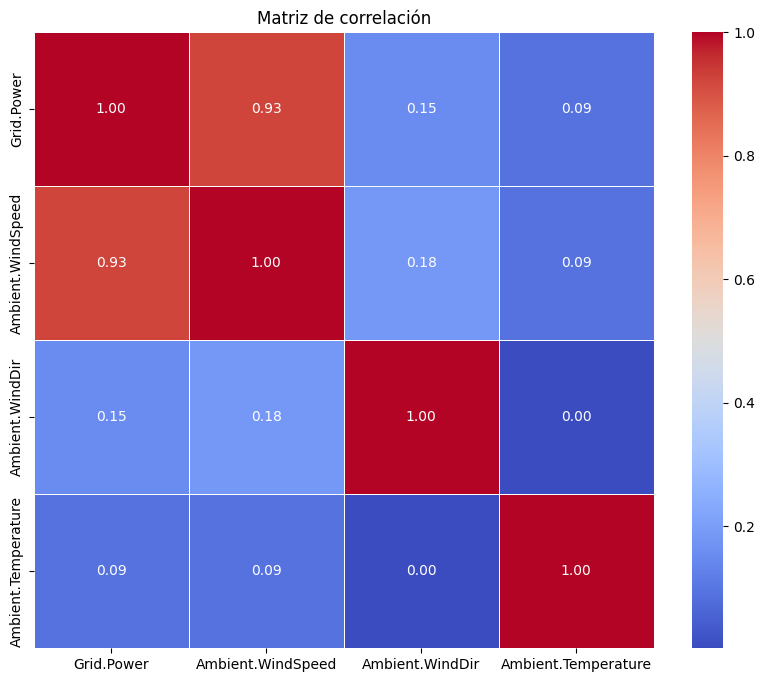

In [19]:
#TODO: 30-05-23 15:00 evaluar el caso de estudio de v_Viento Real vs v_Viento Pronóstico.

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

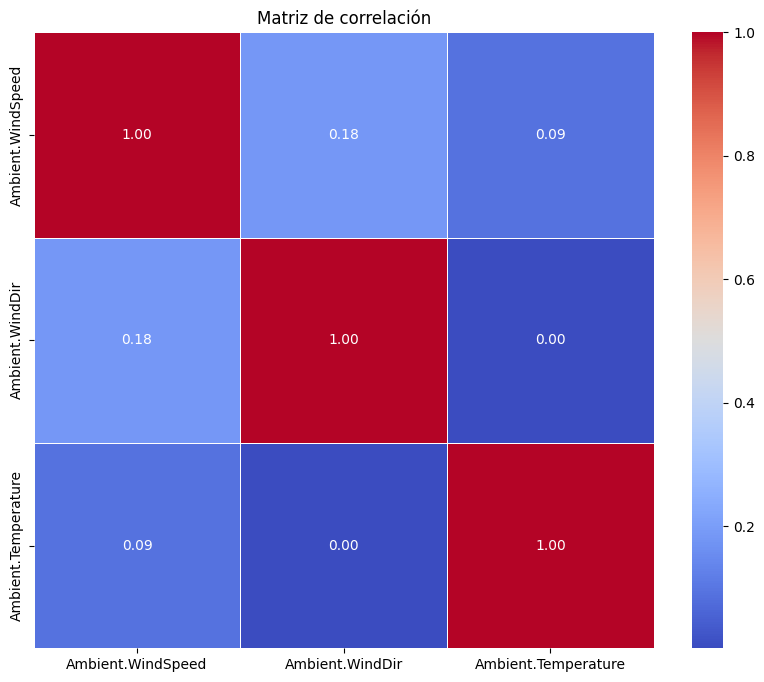

In [22]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [23]:
#separo narrays para train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

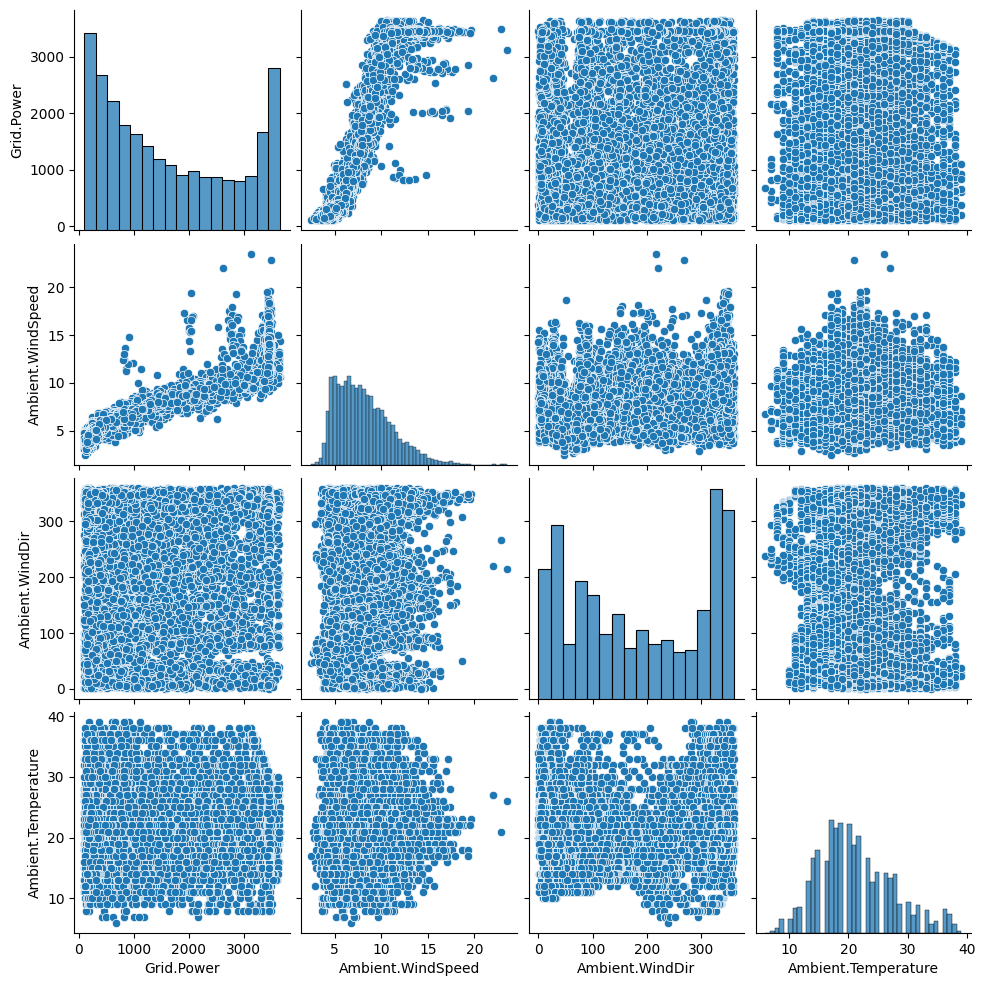

In [24]:
sns.pairplot(df)

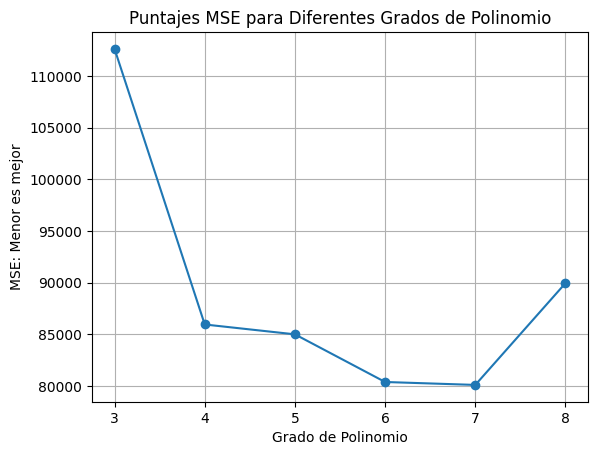

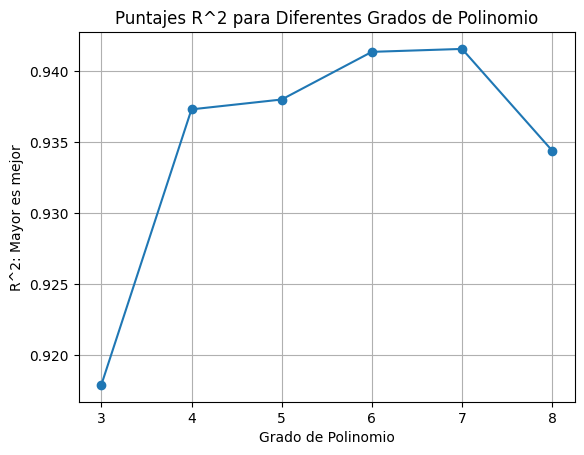

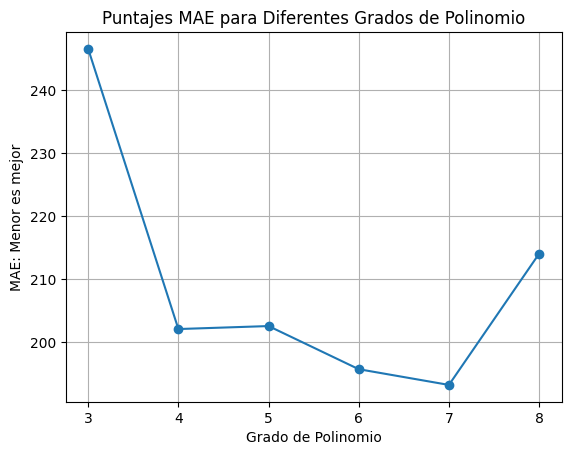

In [25]:
grados_pol = [3,4,5,6,7,8]
plt_mean_squared_error = []
lista_puntajes = []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

mse_scores = []
r2_scores = []
mae_scores = []

for degree in grados_pol:
    # Crear el pipeline con PolynomialFeatures y LinearRegression
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    
    # Entrenar el modelo utilizando los datos de entrenamiento
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular los puntajes
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Crear gráficos separados para cada métrica
#plt.figure(figsize=(12, 8))
plt.figure()
# Gráfico para MSE
#plt.subplot(1, 3, 1)
plt.plot(grados_pol, mse_scores, marker='o')
plt.xlabel('Grado de Polinomio')
plt.ylabel('MSE: Menor es mejor')
plt.title('Puntajes MSE para Diferentes Grados de Polinomio')
#plt.text(10, 10, "MSE: Cuanto menor, mejor", fontsize=10, ha='right', va="top")
plt.grid(True)
# Gráfico para R^2
#plt.subplot(1, 3, 2)
plt.figure()
plt.plot(grados_pol, r2_scores, marker='o')
plt.xlabel('Grado de Polinomio')
plt.ylabel('R^2: Mayor es mejor')
plt.title('Puntajes R^2 para Diferentes Grados de Polinomio')
#plt.text(10, 10, "R^2: Cuanto más cercano a 1, mejor", fontsize=10, ha='right', va="top")
plt.grid(True)
# Gráfico para MAE
#plt.subplot(1, 3, 3)
plt.figure()
plt.plot(grados_pol, mae_scores, marker='o')
plt.xlabel('Grado de Polinomio')
plt.ylabel('MAE: Menor es mejor')
plt.title('Puntajes MAE para Diferentes Grados de Polinomio')
#plt.text(10, 10, "MAE: Cuanto menor, mejor", fontsize=10, ha='right', va="top")
plt.grid(True)
#plt.tight_layout()
plt.show()

In [26]:
#Seteo el polinomio para grado 7
model = make_pipeline(PolynomialFeatures(degree=4, interaction_only=False), LinearRegression())

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los puntajes
print("MSE: ",mean_squared_error(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))

MSE:  85946.98829636717
R2:  0.9373171191666478
MAE:  202.0539839980669


In [27]:
y_test.shape

(1798, 1)

In [28]:
y_pred.shape

(1798, 1)

In [29]:
# Realizar la validación cruzada con 5 folds
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')

# Imprimir los puntajes de R^2 para cada fold
print("Puntajes de R^2 para cada fold:", scores)

# Imprimir el promedio de los puntajes de R^2
print("Promedio de R^2:", np.mean(scores))

Puntajes de R^2 para cada fold: [0.9300501  0.9399534  0.94720312 0.93070244 0.90460768]
Promedio de R^2: 0.930503348505815


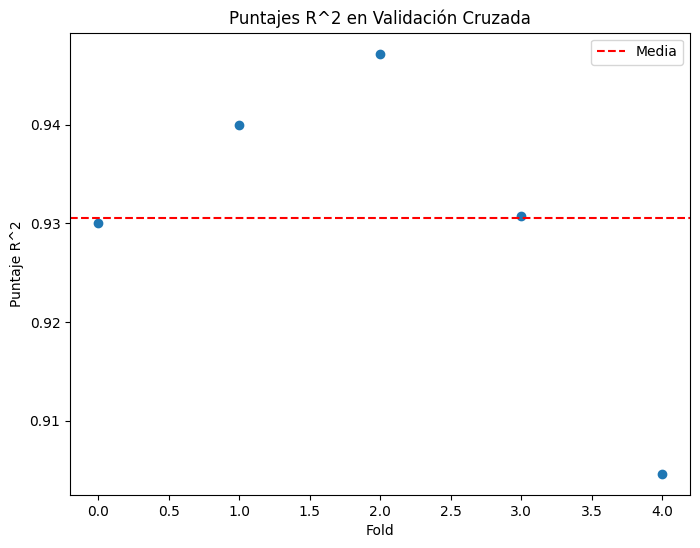

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(scores)), scores)
plt.axhline(scores.mean(), color='red', linestyle='dashed', label='Media')
plt.xlabel('Fold')
plt.ylabel('Puntaje R^2')
plt.title('Puntajes R^2 en Validación Cruzada')
plt.legend()
plt.show()

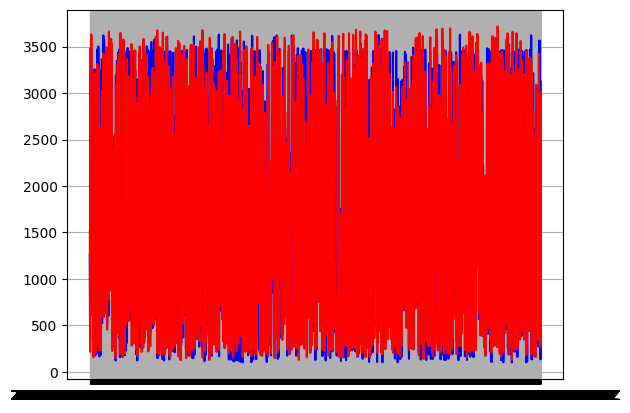

In [31]:
#Grafico para chequear
#%matplotlib notebook
plt.plot(y_test , 'b') # plotting t, a separately 
plt.plot(y_pred, 'r') # plotting t, b separately 
plt.grid()
plt.show()

In [32]:
poly_model = model[0]
lineal_model = model[1]

features_names_in = poly_model.feature_names_in_
n_output_features_ = poly_model.n_output_features_



print(n_output_features_)
print(features_names_in[:])

#print(len(model[0].get_feature_names_out(model[0].feature_names_in_[:])))

#print(model[0].get_feature_names_out(["Ambient.WindSpeed","Ambient.Temperature","Ambient.WindDir"])

35
['Ambient.WindSpeed' 'Ambient.WindDir' 'Ambient.Temperature']


In [61]:
# Obtener el término independiente (intercept) del modelo ajustado
intercept = model[1].intercept_
intercept = str(intercept)
# Obtener los coeficientes de todas las características polinómicas generadas por PolynomialFeatures
coeficientes = model[1].coef_[0]

# Obtener los nombres de todas las características generadas por PolynomialFeatures
nombres_caracteristicas = poly_model.get_feature_names_out()

In [67]:
nombres_caracteristicas

array(['1', 'Ambient.WindSpeed', 'Ambient.WindDir', 'Ambient.Temperature',
       'Ambient.WindSpeed^2', 'Ambient.WindSpeed Ambient.WindDir',
       'Ambient.WindSpeed Ambient.Temperature', 'Ambient.WindDir^2',
       'Ambient.WindDir Ambient.Temperature', 'Ambient.Temperature^2',
       'Ambient.WindSpeed^3', 'Ambient.WindSpeed^2 Ambient.WindDir',
       'Ambient.WindSpeed^2 Ambient.Temperature',
       'Ambient.WindSpeed Ambient.WindDir^2',
       'Ambient.WindSpeed Ambient.WindDir Ambient.Temperature',
       'Ambient.WindSpeed Ambient.Temperature^2', 'Ambient.WindDir^3',
       'Ambient.WindDir^2 Ambient.Temperature',
       'Ambient.WindDir Ambient.Temperature^2', 'Ambient.Temperature^3',
       'Ambient.WindSpeed^4', 'Ambient.WindSpeed^3 Ambient.WindDir',
       'Ambient.WindSpeed^3 Ambient.Temperature',
       'Ambient.WindSpeed^2 Ambient.WindDir^2',
       'Ambient.WindSpeed^2 Ambient.WindDir Ambient.Temperature',
       'Ambient.WindSpeed^2 Ambient.Temperature^2',
       'Ambi

In [62]:
lista_sin_espacios = [elemento.replace(" ", "*") for elemento in nombres_caracteristicas]

In [36]:
lista_sin_espacios[:]

['1',
 'Ambient.WindSpeed',
 'Ambient.WindDir',
 'Ambient.Temperature',
 'Ambient.WindSpeed^2',
 'Ambient.WindSpeed*Ambient.WindDir',
 'Ambient.WindSpeed*Ambient.Temperature',
 'Ambient.WindDir^2',
 'Ambient.WindDir*Ambient.Temperature',
 'Ambient.Temperature^2',
 'Ambient.WindSpeed^3',
 'Ambient.WindSpeed^2*Ambient.WindDir',
 'Ambient.WindSpeed^2*Ambient.Temperature',
 'Ambient.WindSpeed*Ambient.WindDir^2',
 'Ambient.WindSpeed*Ambient.WindDir*Ambient.Temperature',
 'Ambient.WindSpeed*Ambient.Temperature^2',
 'Ambient.WindDir^3',
 'Ambient.WindDir^2*Ambient.Temperature',
 'Ambient.WindDir*Ambient.Temperature^2',
 'Ambient.Temperature^3',
 'Ambient.WindSpeed^4',
 'Ambient.WindSpeed^3*Ambient.WindDir',
 'Ambient.WindSpeed^3*Ambient.Temperature',
 'Ambient.WindSpeed^2*Ambient.WindDir^2',
 'Ambient.WindSpeed^2*Ambient.WindDir*Ambient.Temperature',
 'Ambient.WindSpeed^2*Ambient.Temperature^2',
 'Ambient.WindSpeed*Ambient.WindDir^3',
 'Ambient.WindSpeed*Ambient.WindDir^2*Ambient.Temperature'

In [47]:
lista2 = list()

for i in range(len(lista_sin_espacios)):
    b = str()
    elemento = lista_sin_espacios[i]
    
    if "*" in elemento and "^" in elemento:

        elemento = elemento.replace("*", "*'")

        elemento = elemento.replace("^", "'^")
        b = elemento
    
    elif "^" in elemento and not("*" in elemento):
        elemento = elemento.replace("^", "'^")
        b = elemento

    elif "*" in elemento and not("^" in elemento):
        elemento = elemento.replace("*", "'*'")

        b = elemento

    else:
        b = elemento
    
    lista2.append(b)

lista2


['1',
 'Ambient.WindSpeed',
 'Ambient.WindDir',
 'Ambient.Temperature',
 "Ambient.WindSpeed'^2",
 "Ambient.WindSpeed'*'Ambient.WindDir",
 "Ambient.WindSpeed'*'Ambient.Temperature",
 "Ambient.WindDir'^2",
 "Ambient.WindDir'*'Ambient.Temperature",
 "Ambient.Temperature'^2",
 "Ambient.WindSpeed'^3",
 "Ambient.WindSpeed'^2*'Ambient.WindDir",
 "Ambient.WindSpeed'^2*'Ambient.Temperature",
 "Ambient.WindSpeed*'Ambient.WindDir'^2",
 "Ambient.WindSpeed'*'Ambient.WindDir'*'Ambient.Temperature",
 "Ambient.WindSpeed*'Ambient.Temperature'^2",
 "Ambient.WindDir'^3",
 "Ambient.WindDir'^2*'Ambient.Temperature",
 "Ambient.WindDir*'Ambient.Temperature'^2",
 "Ambient.Temperature'^3",
 "Ambient.WindSpeed'^4",
 "Ambient.WindSpeed'^3*'Ambient.WindDir",
 "Ambient.WindSpeed'^3*'Ambient.Temperature",
 "Ambient.WindSpeed'^2*'Ambient.WindDir'^2",
 "Ambient.WindSpeed'^2*'Ambient.WindDir*'Ambient.Temperature",
 "Ambient.WindSpeed'^2*'Ambient.Temperature'^2",
 "Ambient.WindSpeed*'Ambient.WindDir'^3",
 "Ambient.Wind

In [56]:
def agregar_comilla_astrisco(lista_strings):
    nueva_lista = []

    for elemento in lista_strings:
        pos_ast = elemento.find('*')

        if pos_ast > 0 and elemento[pos_ast - 1].isalpha():
            nuevo_elemento = elemento[:pos_ast] + "'" + elemento[pos_ast:]
            nueva_lista.append(nuevo_elemento)
        else:
            nueva_lista.append(elemento)

    return nueva_lista

lista_con_comilla = agregar_comilla_astrisco(lista2)
lista_con_comilla

['1',
 'Ambient.WindSpeed',
 'Ambient.WindDir',
 'Ambient.Temperature',
 "Ambient.WindSpeed'^2",
 "Ambient.WindSpeed'*'Ambient.WindDir",
 "Ambient.WindSpeed'*'Ambient.Temperature",
 "Ambient.WindDir'^2",
 "Ambient.WindDir'*'Ambient.Temperature",
 "Ambient.Temperature'^2",
 "Ambient.WindSpeed'^3",
 "Ambient.WindSpeed'^2*'Ambient.WindDir",
 "Ambient.WindSpeed'^2*'Ambient.Temperature",
 "Ambient.WindSpeed'*'Ambient.WindDir'^2",
 "Ambient.WindSpeed'*'Ambient.WindDir'*'Ambient.Temperature",
 "Ambient.WindSpeed'*'Ambient.Temperature'^2",
 "Ambient.WindDir'^3",
 "Ambient.WindDir'^2*'Ambient.Temperature",
 "Ambient.WindDir'*'Ambient.Temperature'^2",
 "Ambient.Temperature'^3",
 "Ambient.WindSpeed'^4",
 "Ambient.WindSpeed'^3*'Ambient.WindDir",
 "Ambient.WindSpeed'^3*'Ambient.Temperature",
 "Ambient.WindSpeed'^2*'Ambient.WindDir'^2",
 "Ambient.WindSpeed'^2*'Ambient.WindDir*'Ambient.Temperature",
 "Ambient.WindSpeed'^2*'Ambient.Temperature'^2",
 "Ambient.WindSpeed'*'Ambient.WindDir'^3",
 "Ambient.

In [49]:
print(coeficientes.shape)

print(nombres_caracteristicas.shape)

(35,)
(35,)


In [57]:
poli = f"{intercept[1:-1]}+"

for i, coef in enumerate(coeficientes):
    
    #print(lista2[i])
    #print(coef)
    

    if lista_con_comilla[i][0].isalpha() and lista_con_comilla[i][-1].isdigit():

            poli += f"{coef:.20f}*'{lista_con_comilla[i]}+"
            #print(f"'{lista2[i]}+{coef}")

    else :
        poli += f"{coef:.20f}*'{lista_con_comilla[i]}'+"

        #print(f"{coef:f}")
        #print(coef)


In [58]:
poli

"3762.20782929+0.00010898526781550662*'1'+-2337.54123463039604757796*'Ambient.WindSpeed'+-8.08333051293315563157*'Ambient.WindDir'+192.01662310085004037319*'Ambient.Temperature'+435.93138932142147723425*'Ambient.WindSpeed'^2+3.00717593750307532474*'Ambient.WindSpeed'*'Ambient.WindDir'+-39.31033951445519392109*'Ambient.WindSpeed'*'Ambient.Temperature'+-0.00804979862061764272*'Ambient.WindDir'^2+0.10602717732548297414*'Ambient.WindDir'*'Ambient.Temperature'+-7.73824174580177892580*'Ambient.Temperature'^2+-26.72875338380114129677*'Ambient.WindSpeed'^3+-0.19595794150127135436*'Ambient.WindSpeed'^2*'Ambient.WindDir'+2.11470063624232462729*'Ambient.WindSpeed'^2*'Ambient.Temperature'+-0.00148990923557507375*'Ambient.WindSpeed'*'Ambient.WindDir'^2+-0.07436071877568681265*'Ambient.WindSpeed'*'Ambient.WindDir'*'Ambient.Temperature'+1.42624971192725147340*'Ambient.WindSpeed'*'Ambient.Temperature'^2+0.00010823058735248346*'Ambient.WindDir'^3+-0.00141131785073045054*'Ambient.WindDir'^2*'Ambient.Tem

In [59]:
poli = poli.replace("+-","-")
poli

"3762.20782929+0.00010898526781550662*'1'-2337.54123463039604757796*'Ambient.WindSpeed'-8.08333051293315563157*'Ambient.WindDir'+192.01662310085004037319*'Ambient.Temperature'+435.93138932142147723425*'Ambient.WindSpeed'^2+3.00717593750307532474*'Ambient.WindSpeed'*'Ambient.WindDir'-39.31033951445519392109*'Ambient.WindSpeed'*'Ambient.Temperature'-0.00804979862061764272*'Ambient.WindDir'^2+0.10602717732548297414*'Ambient.WindDir'*'Ambient.Temperature'-7.73824174580177892580*'Ambient.Temperature'^2-26.72875338380114129677*'Ambient.WindSpeed'^3-0.19595794150127135436*'Ambient.WindSpeed'^2*'Ambient.WindDir'+2.11470063624232462729*'Ambient.WindSpeed'^2*'Ambient.Temperature'-0.00148990923557507375*'Ambient.WindSpeed'*'Ambient.WindDir'^2-0.07436071877568681265*'Ambient.WindSpeed'*'Ambient.WindDir'*'Ambient.Temperature'+1.42624971192725147340*'Ambient.WindSpeed'*'Ambient.Temperature'^2+0.00010823058735248346*'Ambient.WindDir'^3-0.00141131785073045054*'Ambient.WindDir'^2*'Ambient.Temperature'+

In [60]:
poli = poli.replace("'Ambient.WindSpeed'","'Velocidad de Viento'")
poli = poli.replace("'Ambient.WindDir'","'Dirección de viento'")
poli = poli.replace("'Ambient.WindDir","'Dirección de viento'")
poli = poli.replace("'Ambient.Temperature'","'Temperatura Ambiente'")
poli

"3762.20782929+0.00010898526781550662*'1'-2337.54123463039604757796*'Velocidad de Viento'-8.08333051293315563157*'Dirección de viento'+192.01662310085004037319*'Temperatura Ambiente'+435.93138932142147723425*'Velocidad de Viento'^2+3.00717593750307532474*'Velocidad de Viento'*'Dirección de viento'-39.31033951445519392109*'Velocidad de Viento'*'Temperatura Ambiente'-0.00804979862061764272*'Dirección de viento'^2+0.10602717732548297414*'Dirección de viento'*'Temperatura Ambiente'-7.73824174580177892580*'Temperatura Ambiente'^2-26.72875338380114129677*'Velocidad de Viento'^3-0.19595794150127135436*'Velocidad de Viento'^2*'Dirección de viento'+2.11470063624232462729*'Velocidad de Viento'^2*'Temperatura Ambiente'-0.00148990923557507375*'Velocidad de Viento'*'Dirección de viento'^2-0.07436071877568681265*'Velocidad de Viento'*'Dirección de viento'*'Temperatura Ambiente'+1.42624971192725147340*'Velocidad de Viento'*'Temperatura Ambiente'^2+0.00010823058735248346*'Dirección de viento'^3-0.0014